# 4.9: Intro to Data Visualization with Python
# Part II

Content List:
1. Import Libraries, Create Path and Import Datasets
2. Create a histogram using the "order_hour_of_day" column
3. Create a bar chart from the “loyalty_flag” column
4. Create sample subset of the data
5. Create a line chart of 'order_hour_of_day' vs 'prices' from the small subset of data
6. Create a line chart exploring the connections between age and number of dependents
7. Create a scatterplot exploring the connections between age and income

1. Import Libraries, Create Path and Import Datasets

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Create Path
path = r'C:\Users\ryanc\OneDrive\Documents\Data Analytics Exercises\Python\Instacart Basket Analysis'

A quick note: I kept running into memory issues during this notebook so I made a version of the complete merged data with only the columns needed to complete this notebook. This is the df I'm importing below

In [3]:
#Import final merged df
final_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_merged_2.pkl'))

# Question 2:
The bar chart, a histogram, a scatterplot, and a line chart were created in a previous notebook following the example.

In [14]:
#View all columns setting
pd.set_option('display.max_columns', None)

In [15]:
#View head of data
final_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,new_busiest_days,busiest_hours,max_order,loyalty_flag,avg_price,spender_flag,order_freq,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,3.0,5,0,Mid-range product,Regularly Busy days,Most Orders,32,Regular customer,6.9375,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,20.0,1,1,Mid-range product,Regularly Busy days,Average Orders,32,Regular customer,6.9375,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.000000,3160996,138,1,5,13,NaN,4,0,High-range product,Regularly Busy days,Most Orders,32,Regular customer,6.9375,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.000000,2254091,138,10,5,14,6.0,1,1,High-range product,Regularly Busy days,Most Orders,32,Regular customer,6.9375,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,1000,Apricots,18,10,12.898438,505689,138,9,6,12,7.0,5,0,Mid-range product,Regularly Busy days,Most Orders,32,Regular customer,6.9375,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


2. Create a histogram using the "order_hour_of_day" column

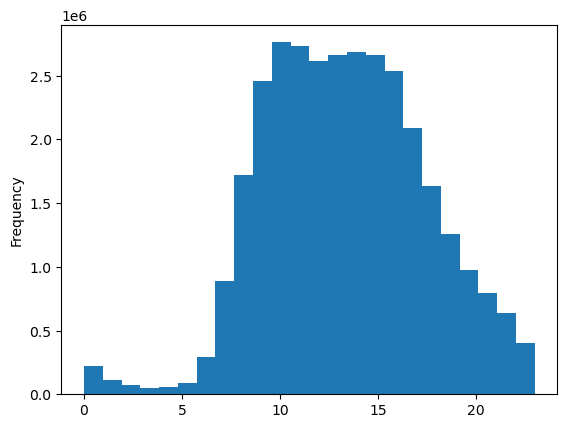

In [21]:
#Create a histogram using the "order_hour_of_day" column
order_hour_hist = final_merged['order_hour_of_day'].plot.hist(bins = 24)

I used 24 bins for this histogram to easily see the number of orders for each hour of the day. We see a left skewed histogram. This makes sense as the lower numbers are either the middle of the night or very early in the morning. We see that orders start to pick up around hour 7 and gets busier until hour 15 when it begins to drop off. Although even though orders are decreasing, it's still busy until hours 21-22. We previously defined the hours of 6-8 and 17-23 as 'regularly busy' and 9-16 as the 'busiest hours'

In [22]:
#Export this histogram
order_hour_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_hist.png'))

3. Create a bar chart from the “loyalty_flag” column

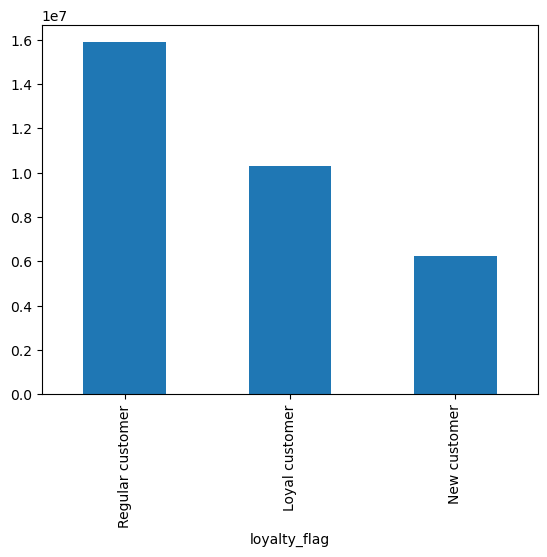

In [24]:
#Create a bar chart from the “loyalty_flag” column
loyalty_bar = final_merged['loyalty_flag'].value_counts().plot.bar()

In [25]:
#Export this bar chart
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'))

4. Create sample subset of the data

In [4]:
#Create a new list holding True/False values using a random number generator
np.random.seed(4)
dev = np.random.rand(len(final_merged)) <= 0.7

In [5]:
#Store 70% of the sample in the df big
big = final_merged[dev]

In [6]:
#Store 30% of the sample in the df small
small = final_merged[~dev]

In [7]:
#Check size of original df 'final_merged'
len(final_merged)

32404859

In [8]:
#Check size of 'big' and 'small' df's
len(big) + len(small)

32404859

In [9]:
#Create a df using only the columns necessary to create the needed line graph
df_2 = small[['prices', 'order_hour_of_day']]

5. Create a line chart of 'order_hour_of_day' vs 'prices' from the small subset of data

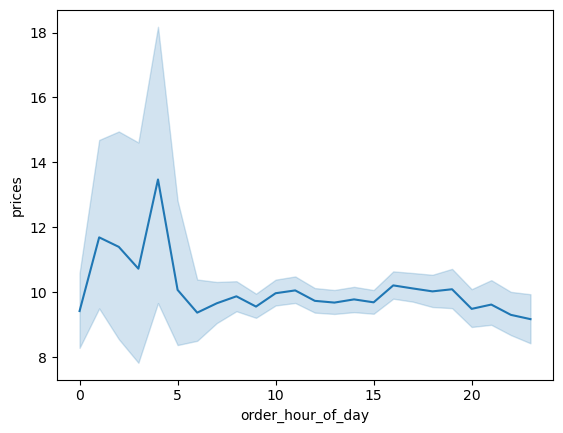

In [10]:
#Create a line chart of 'order_hour_of_day' vs 'prices' from the small subset of data
line_prices_by_hour = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [11]:
#Export this line chart
line_prices_by_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_by_hour.png'))

6. Create a line chart exploring the connections between age and number of dependents

In [12]:
#Create a df using only the columns necessary to create the needed line graph
df_2 = small[['Age', 'n_dependants']]

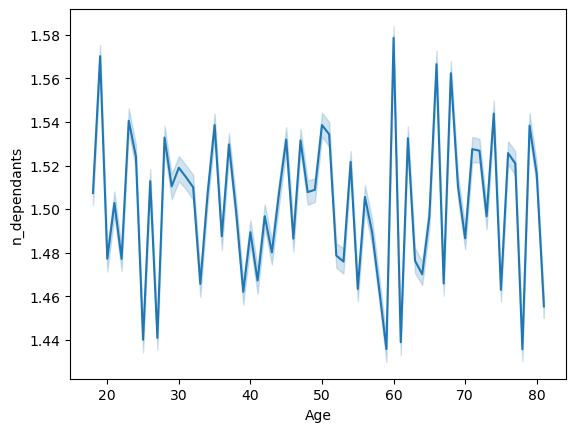

In [13]:
#Create a line chart of 'Age' vs 'n_dependants' from the small subset of data
line_prices_by_hour = sns.lineplot(data = df_2, x = 'Age',y = 'n_dependants')

Note: Forgot to rename this new line chart to a different name but already saved it. Will save it under a new name in my Visualizations folder

Looking at this line chart I see no correlation with Age and Number of Dependants. This is interesting because I would have expected the Number of Dependants to drop off steadily with older age. 

In [14]:
#Export this line chart
line_prices_by_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

7. Create a scatterplot exploring the connections between age and income

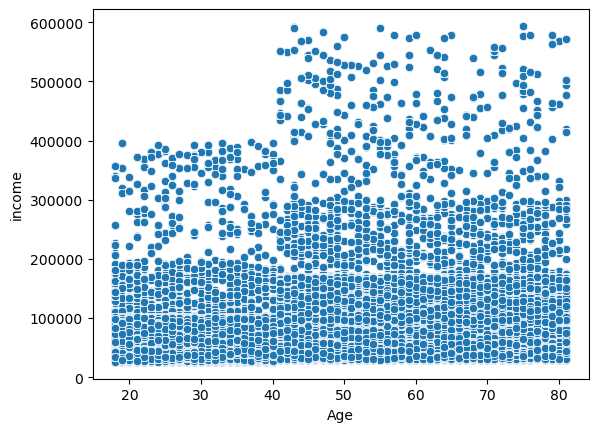

In [16]:
scatter_age_income = sns.scatterplot(x = 'Age', y = 'income',data = small)

I see no clear correlation between Age and Income. People making around or under $200,000 a year are spread out consistently from 20 to 80. The higher the level of income, the fewer circles there are but again, there is no direct correlation with age. 

In [17]:
#Export this scatter chart
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))